<a href="https://colab.research.google.com/github/peytonrunyan/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Peyton_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [12]:
# Check for NaNs
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
y = df.loc[:, ['price']]
X = df.drop('price', axis = 1)

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, y.values, test_size=.5, random_state=13)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [22]:
#print coefficient values next to names

coef = list(X)

for i in range(len(coef)):
  print(str(coef[i])+':  ' + str(model.coef_[0][i]))
print("Model Intercept: ", model.intercept_)

make:  -29.581175544176713
body:  -1850.6121303933153
mileage:  -38.64156419913161
engV:  360.589902385011
engType:  -986.1141982549201
registration:  4449.813011882961
year:  1099.5045296170053
drive:  8165.656191003621
Model Intercept:  [-2186994.93771366]


## 1.5 Use the test data to make predictions

In [0]:
y_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [30]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 21383.459757070585
R^2 is 0.2810050281342944


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Every unit increase in "year" corresponds to an average increase in the mean of "price" by $1,099 

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE is the square root of the variance of the residuals, and so can be interpreted as the standard deviation of the unexplained variance in price. 

## 1.9 How should we interpret the $R^2$?

I've personally got a bone to pick with $R^2$ from an inferential standpoint, but by convention it's interpreted as the amount of variance in your dependent variable explained by the model. This definition is okay as long as it's clear that "explained by the model" is not the same as "correctly explained by the model". 

The Greeks explained that Helios wore the sun as a hat and went around the sky on a horse-drawn chariot that eventually dropped into a cup. Their model explained 100% of the variance in position of the Sun, but somehow physicists remain unconvinced. 

I think "how close the data are fitted to the regression" leaves less room for misinterpretation. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
#log the price! 
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

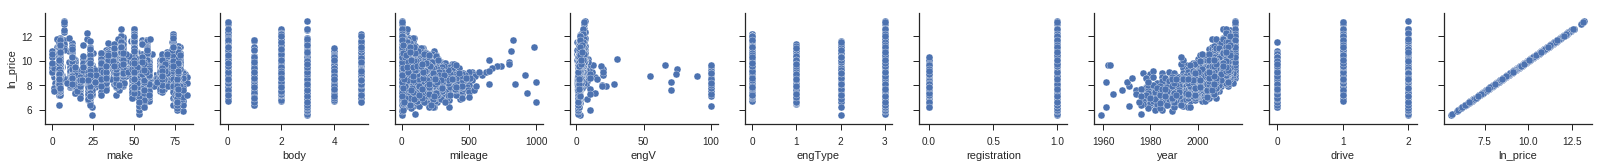

In [35]:
sns.set(style="ticks", color_codes=True)

x_columns = df.columns.drop('ln_price')
x_columns = df.columns.drop('price')

#compare all existing columns against price
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
"""Year, mileage, engType, adn drive all appear to possibly be curved upward,
which suggests that they might benefit from being squared 
"""

#year
df['year_sq'] = df['year']**2

#mileage
df['mileage_sq'] = df['mileage']**2

#engType
df['engType_sq'] = df['engType']**2

#drive
df['drive_sq'] = df['drive']**2

x_columns = df.columns.drop('ln_price')
x_columns = df.columns.drop('price')

In [60]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,year_sq,mileage_sq,engType_sq,drive_sq
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,4624,1,1
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,29929,1,4
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,18225,9,4
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,26244,0,0
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,6889,9,1


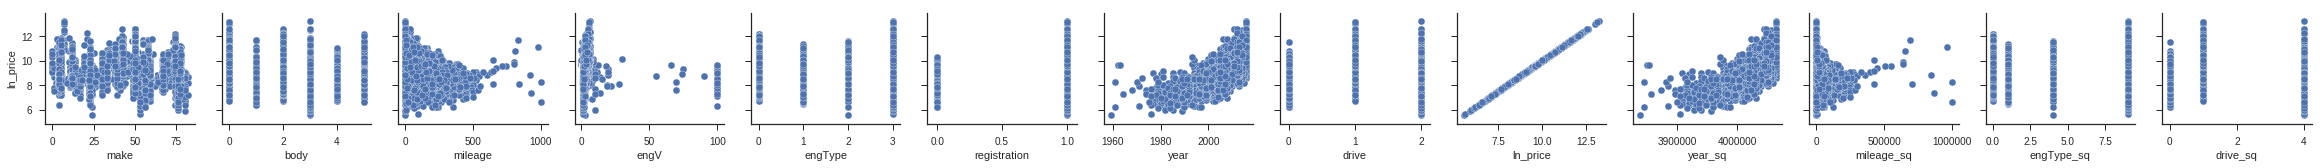

In [61]:
#plot to examine how the squared features have changed relative to originals
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [62]:
y = df.loc[:, ['ln_price']]
X = df.drop(['price','ln_price'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X.values, y.values, test_size=.5, random_state=13)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print('Coefficients')
coef = list(X)
for i in range(len(coef)):
  print(str(coef[i])+':  ' + str(model.coef_[0][i]))

print("Model Intercept: ", model.intercept_)
print('\n')

RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))


Coefficients
make:  -0.0015770917580411857
body:  -0.010439404521053536
mileage:  0.0004663839745997466
engV:  0.008017254472749445
engType:  -0.22495514770436964
registration:  0.6873992338708533
year:  -5.50357764558097
drive:  1.4772402661377075
year_sq:  0.0013976811754178708
mileage_sq:  1.677207760366478e-07
engType_sq:  0.06620523804340456
drive_sq:  -0.6012186786552942
Model Intercept:  [5424.04050796]


RMSE is 0.5192389632586787
R^2 is 0.7087673331036639


In [0]:
# I don't imagine I should be drawing attention to it, but some of those coeffs 
# are impossible. Will try to fix this in the last cells of the exam since this
# is not explicitly part of the exam (correct coeffs) <<< corrected at the end

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

For every unit increase in "year" there is a corresponding percentage increase in the mean of "price"

Worth noting: "The "multiplying the coefficient by 100 and interpret it as percent change" method is only applicable to coefficient within the range of about -.08 to .08. Beyond this range, the original and the exponent of it can start to deviate considerably."

See here[https://stats.stackexchange.com/questions/61453/interpretation-in-log-linear-regressions-with-coefficients-bigger-than-1]

Also worth noting, this is actually incorrect in the above model because we also include a "year squared" term. When both the polynomial and linear feature are included, it changes the interpreation of the coefficient of the linear feature.

See page 10 here [http://www.medicine.mcgill.ca/epidemiology/Joseph/courses/EPIB-621/multiple.pdf]

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize the loss/cost function. The loss function looks at the distance between our predicted y value and our actual value for each point, squares each of the differenes, and then adds them. The denominator is kind of arbitrary as a scaling factor for our calculation. Gradient descent is ultimately a tool to find the coefficients that reduce the sum of the squared errors as much as possible. 

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate is the alpha (or apparently "gamma" too depending on who you're talking to) in our loss/cost function. It determines the size of the step that our gradient descent algorithm takes in search of a local minimum. A large learning rate can allow us to find the local minimum with the fewest iterations, but may also jump past the mark entirely. A small learning rate is less likely to miss the mark (if we are dealing with a function with only a single local minimum), but will take many iterations. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [48]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1725.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:32:43   Log-Likelihood:                -6275.9
No. Observations:                8495   AIC:                         1.258e+04
Df Residuals:                    8482   BIC:                         1.267e+04
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6007.9574    641.168      9.370   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [53]:
print('VIF')
columns = list(X)
for i in range(len(columns)):
  print(str(columns[i])+':  ' + str(variance_inflation_factor(X.values, i)))

VIF
const:  3462296610.330536
make:  1.0619611913443308
body:  1.7519118353835763
mileage:  7.53277699092819
engV:  1.0162298207015188
engType:  31.818617802189046
registration:  1.1317632239893058
year:  166196.42748368587
drive:  18.62361165818084
year_sq:  166559.7244934088
mileage_sq:  5.078334715516184
engType_sq:  30.710265837479973
drive_sq:  18.36032153912244


In [0]:
"""Yes, we have multicollinearity problems with the following:
engType
year
drive
year_sq
engType_sq
drive_sq



In [49]:
no_const = X.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive,year_sq,mileage_sq,engType_sq,drive_sq
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,-0.013679,-0.031106,-0.010674,-0.191591
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,-0.154919,0.195170,-0.162796,0.014063
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,-0.504345,0.872954,-0.232794,0.132141
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,-0.041024,0.033698,-0.008787,0.063704
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,-0.040323,-0.169311,0.982107,-0.028088
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,0.185613,-0.163092,0.133624,-0.079760
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,0.999995,-0.389608,-0.009716,-0.249121
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,-0.169444,0.083042,-0.038055,0.954145
year_sq,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,0.999995,-0.169444,1.000000,-0.390230,-0.009529,-0.248920
mileage_sq,-0.031106,0.195170,0.872954,0.033698,-0.169311,-0.163092,-0.389608,0.083042,-0.390230,1.000000,-0.167364,0.132166


##I believe that the above covers the exam, but I'm going to try to fix my coefficients below

In [66]:
#test log-linear coefficients by removing polynomial terms

y = df.loc[:, ['ln_price']]
X = df.drop(['price','ln_price','engType_sq','year_sq','drive_sq','mileage_sq'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X.values, y.values, test_size=.5, random_state=13)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print('Coefficients')
coef = list(X)
for i in range(len(coef)):
  print(str(coef[i])+':  ' + str(model.coef_[0][i]))

print("Model Intercept: ", model.intercept_)
print('\n')

RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))


Coefficients
make:  -0.0013056151185597573
body:  -0.09393190905504512
mileage:  -9.993550533014817e-05
engV:  0.012672479922340552
engType:  -0.054380738409163125
registration:  0.7430708010170006
year:  0.09442340204211512
drive:  0.40323497514372464
Model Intercept:  [-180.84374719]


RMSE is 0.5793789180718742
R^2 is 0.6373973983338468


In [0]:
#Beautiful, it looks like everything is happy again, even if we lost some
#R^2. Probably worth diving deeper into log-linear, linear-log, and log-log